<img src="https://teaching.bowyer.ai/sdsai/resources/0/img/IMPERIAL_logo_RGB_Blue_2024.svg" alt="Imperial Logo" width="500"/><br /><br />

Ensemble Methods and Unsupervised Learning - Tutorial Exercise Solutions
==============
### SURG70098 - Surgical Data Science and AI
### Stuart Bowyer

# Exercise 6.1

## Load the dataset
Using the sample code from UCI

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

Y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

X = breast_cancer_wisconsin_diagnostic['data']['features']
y = breast_cancer_wisconsin_diagnostic['data']['targets']['Diagnosis'] == 'M'

dt.fit(X, y)

cross_val_result = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

print(f'Mean cross validated accuracy: {cross_val_result.mean()}')



Mean cross validated accuracy: 0.9173730787144854


## Install the packages

In [ ]:
%pip install scikit-learn
%pip install imbalanced-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Basic EDA
There is lots more your could do here, but we look at some basic summary stats, plot the distributions, visualise the correlation coefficients and try to visualise the scatter matrix.

In [ ]:
features = breast_cancer_wisconsin_diagnostic['data']['features']
features.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


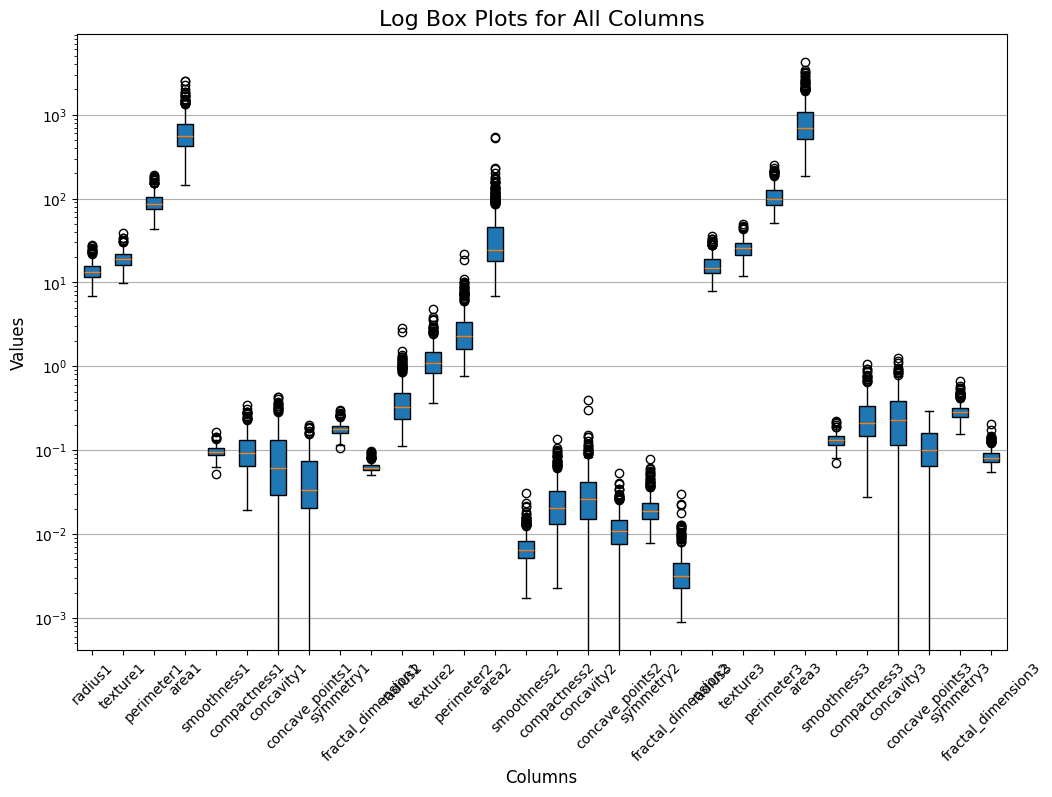

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(features, patch_artist=True)
plt.title('Log Box Plots for All Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(range(1, len(features.columns) + 1), features.columns, rotation=45, fontsize=10)
plt.yscale('log')
plt.grid(axis='y')
plt.show()

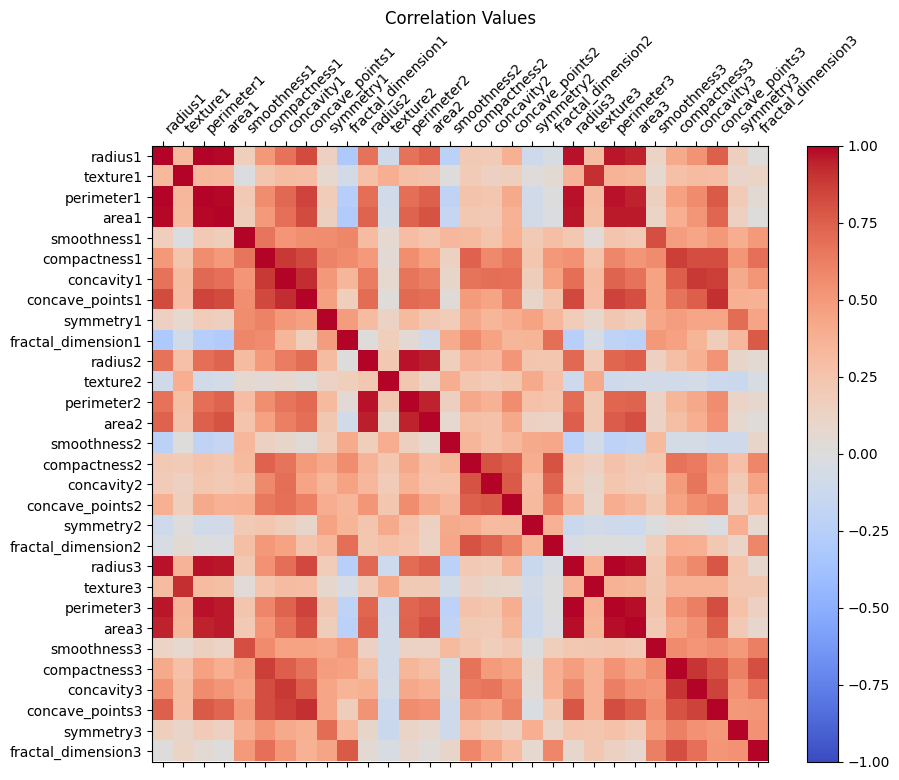

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(features.corr(), cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ax.set_xticks(np.arange(len(features.columns)))
ax.set_yticks(np.arange(len(features.columns)))
ax.set_xticklabels(features.columns, rotation=45, ha='left', fontsize=10)
ax.set_yticklabels(features.columns, fontsize=10)
ax.set_title('Correlation Coefficients')

plt.show()

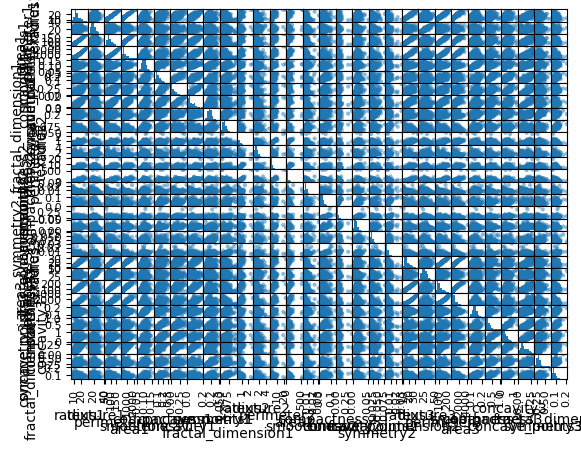

In [ ]:
pd.plotting.scatter_matrix(features)
plt.show()

## Data Preparation
The data are already very clean, but there are still a few preparation stages you can implements

### Standardisation

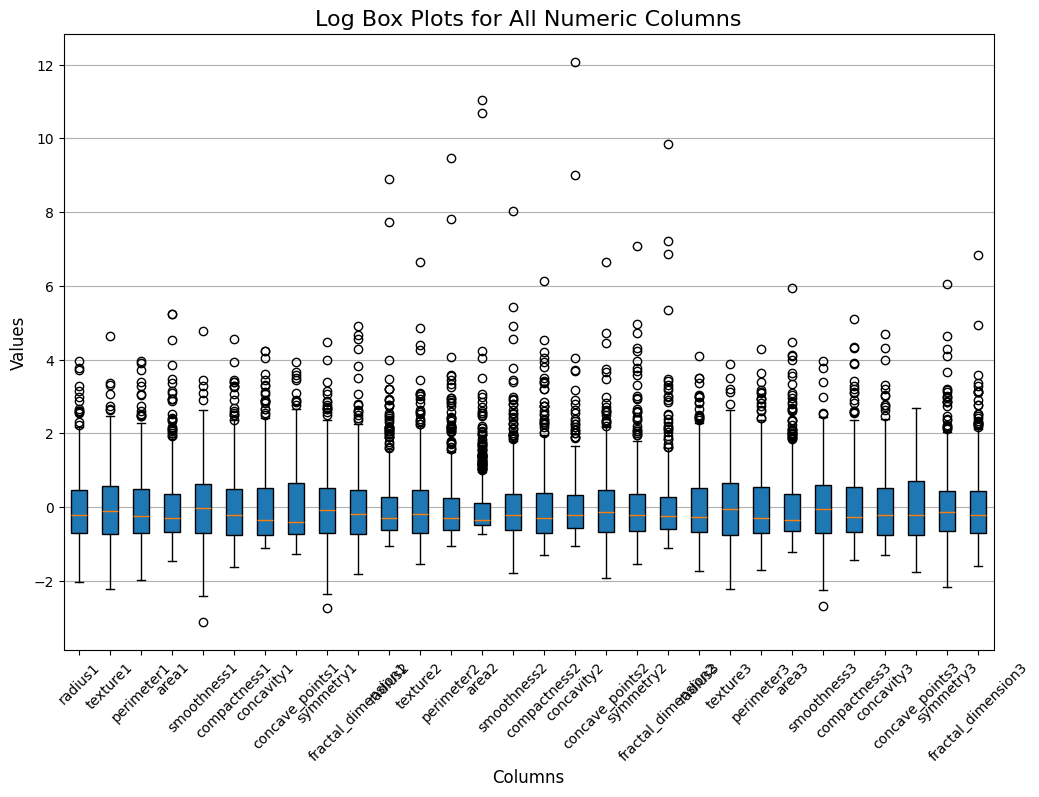

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisation
features_standardised = StandardScaler() \
 .fit_transform(features)

plt.figure(figsize=(12, 8))
plt.boxplot(features_standardised, patch_artist=True)
plt.title('Box Plots for Standardised Columns', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(range(1, len(features.columns) + 1), features.columns, rotation=45, fontsize=10)
plt.grid(axis='y')
plt.show()

## Address Class Imbalance
SMOTE oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE oversampler
smote = SMOTE(random_state=1)

X_res, Y_res = smote.fit_resample(features_standardised, breast_cancer_wisconsin_diagnostic['data']['targets']['Diagnosis'])

## Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

X = X_res
y = Y_res

# Create the initial model
model = MLPClassifier(random_state=1, max_iter=1000)

# Define the grid search
grid_search = GridSearchCV(
    model,
    param_grid={
        'hidden_layer_sizes': range(5,45,5),
        'activation': ['relu', 'logistic', 'tanh']
    },
    scoring='accuracy'
)

# Perform the grid search
grid_search.fit(X, y)

# Get the best score and best parameters
print(f"Best Score:      {grid_search.best_score_}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Score:      0.9831970846055352
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': 30}


## Random Forest Model
This is quite a large grid to search and will take a while to run. You could also explore some more of the parameters in `RandomForestClassifier`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the initial model
model = RandomForestClassifier(random_state=1)

# Define the grid search
grid_search = GridSearchCV(
    model,
    param_grid={
        'n_estimators': range(80, 200, 20),
        'max_depth': range(1, 20)
    },
    scoring='accuracy'
)

# Perform the grid search
grid_search.fit(X, y)

# Get the best score and best parameters
print(f"Best Score:      {grid_search.best_score_}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Score:      0.9720082734167242
Best Parameters: {'max_depth': 5, 'n_estimators': 140}


# Exercise 6.2

### Basic Two Feature Cluster
The clusters do not look very meaningful

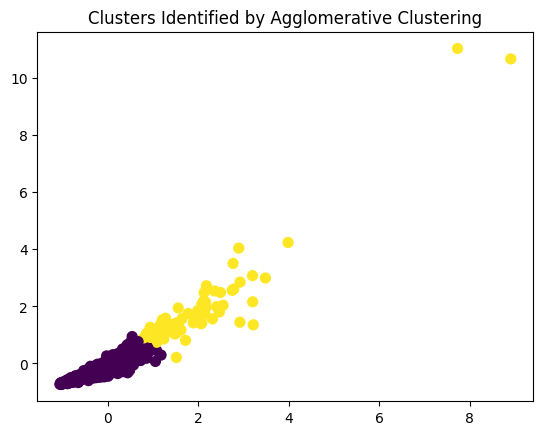

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = breast_cancer_wisconsin_diagnostic['data']['features'][['radius2', 'area2']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Clusters Identified by Agglomerative Clustering")
plt.show()


### All feature K means clustering
This identifies two clusters, one which is almost entirely Malignant and one which is mostly Benign

In [ ]:
from sklearn.metrics import silhouette_score

X = breast_cancer_wisconsin_diagnostic['data']['features'].copy()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=123)

# Calculate Silhouette Score
score = silhouette_score(X, labels)

print(score)

X[ 'clust'] = kmeans.fit_predict(X)
X['classif'] = breast_cancer_wisconsin_diagnostic['data']['targets']
X

X.groupby('clust').classif.value_counts()

0.5921210576525004


clust  classif
0      B          356
       M           82
1      M          130
       B            1
Name: count, dtype: int64

### Now with Three Clusters
This now has one cluster that is entirely malignant, one that is mostly benign and one that is unclear. This could be clinically interesting to understand these types of tumour. One could then explore whether this links with other outcomes or prognosis.

In [ ]:
X = breast_cancer_wisconsin_diagnostic['data']['features'].copy()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, labels)

res = pd.DataFrame()
res['clust'] = labels
res['classif'] = breast_cancer_wisconsin_diagnostic['data']['targets']
res

res.groupby('clust').classif.value_counts()

clust  classif
0      M           61
       B           36
1      M          118
2      B          321
       M           33
Name: count, dtype: int64

# Exercise 6.3

## Two principal features

Explained variance ratio: [0.44272026 0.18971182]


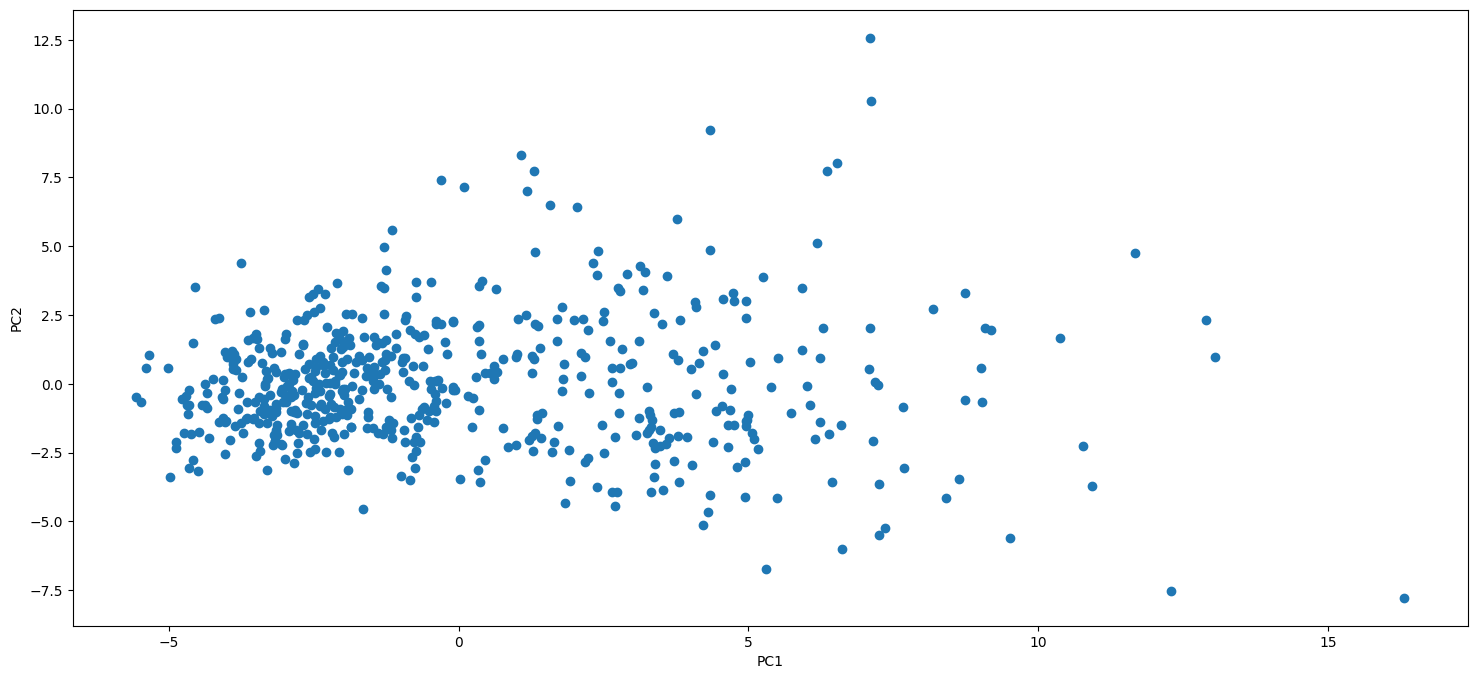

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Select the two columns for analysis
X = features_standardised
pca = PCA(n_components=2)
pca.fit(X)
# Print the Explained Variance Ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
# Transform the data
X_trans = pca.transform(X)
# Plot the Full Heart Rate Data
fig = plt.figure(figsize=(18, 8))
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Plot the explained variance

Explained variance ratio: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


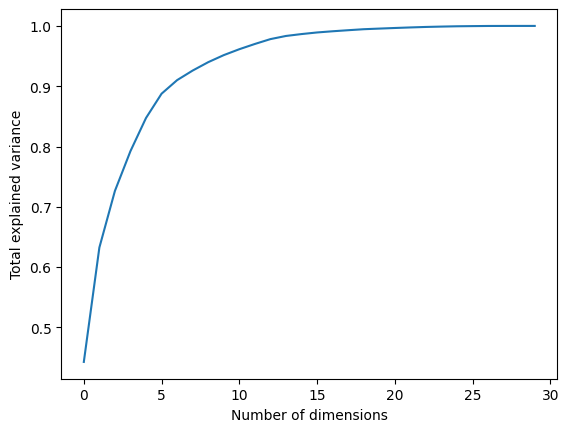

In [ ]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
# Print the Explained Variance Ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


# Cumulative sum will give you the num of information for each dimension
dimensional_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(dimensional_explained_variance)
plt.xlabel('Number of dimensions')
plt.ylabel('Total explained variance')
plt.show()